## TPOT Demonstration
Example of tpot for a classification dataset

From TPOT's paper:<br>auto-sklearn uses Bayesian optimization to discover the ideal combination of feature preprocessors, models, and model hyperparameters to maximize classification accuracy.<br>However, auto-sklearn explores a fixed set of pipelines that only include one data preprocessor, one feature preprocessor, and one model. Thus, auto-sklearn
is incapable of producing arbitrarily large pipelines, which may be important for autoML.

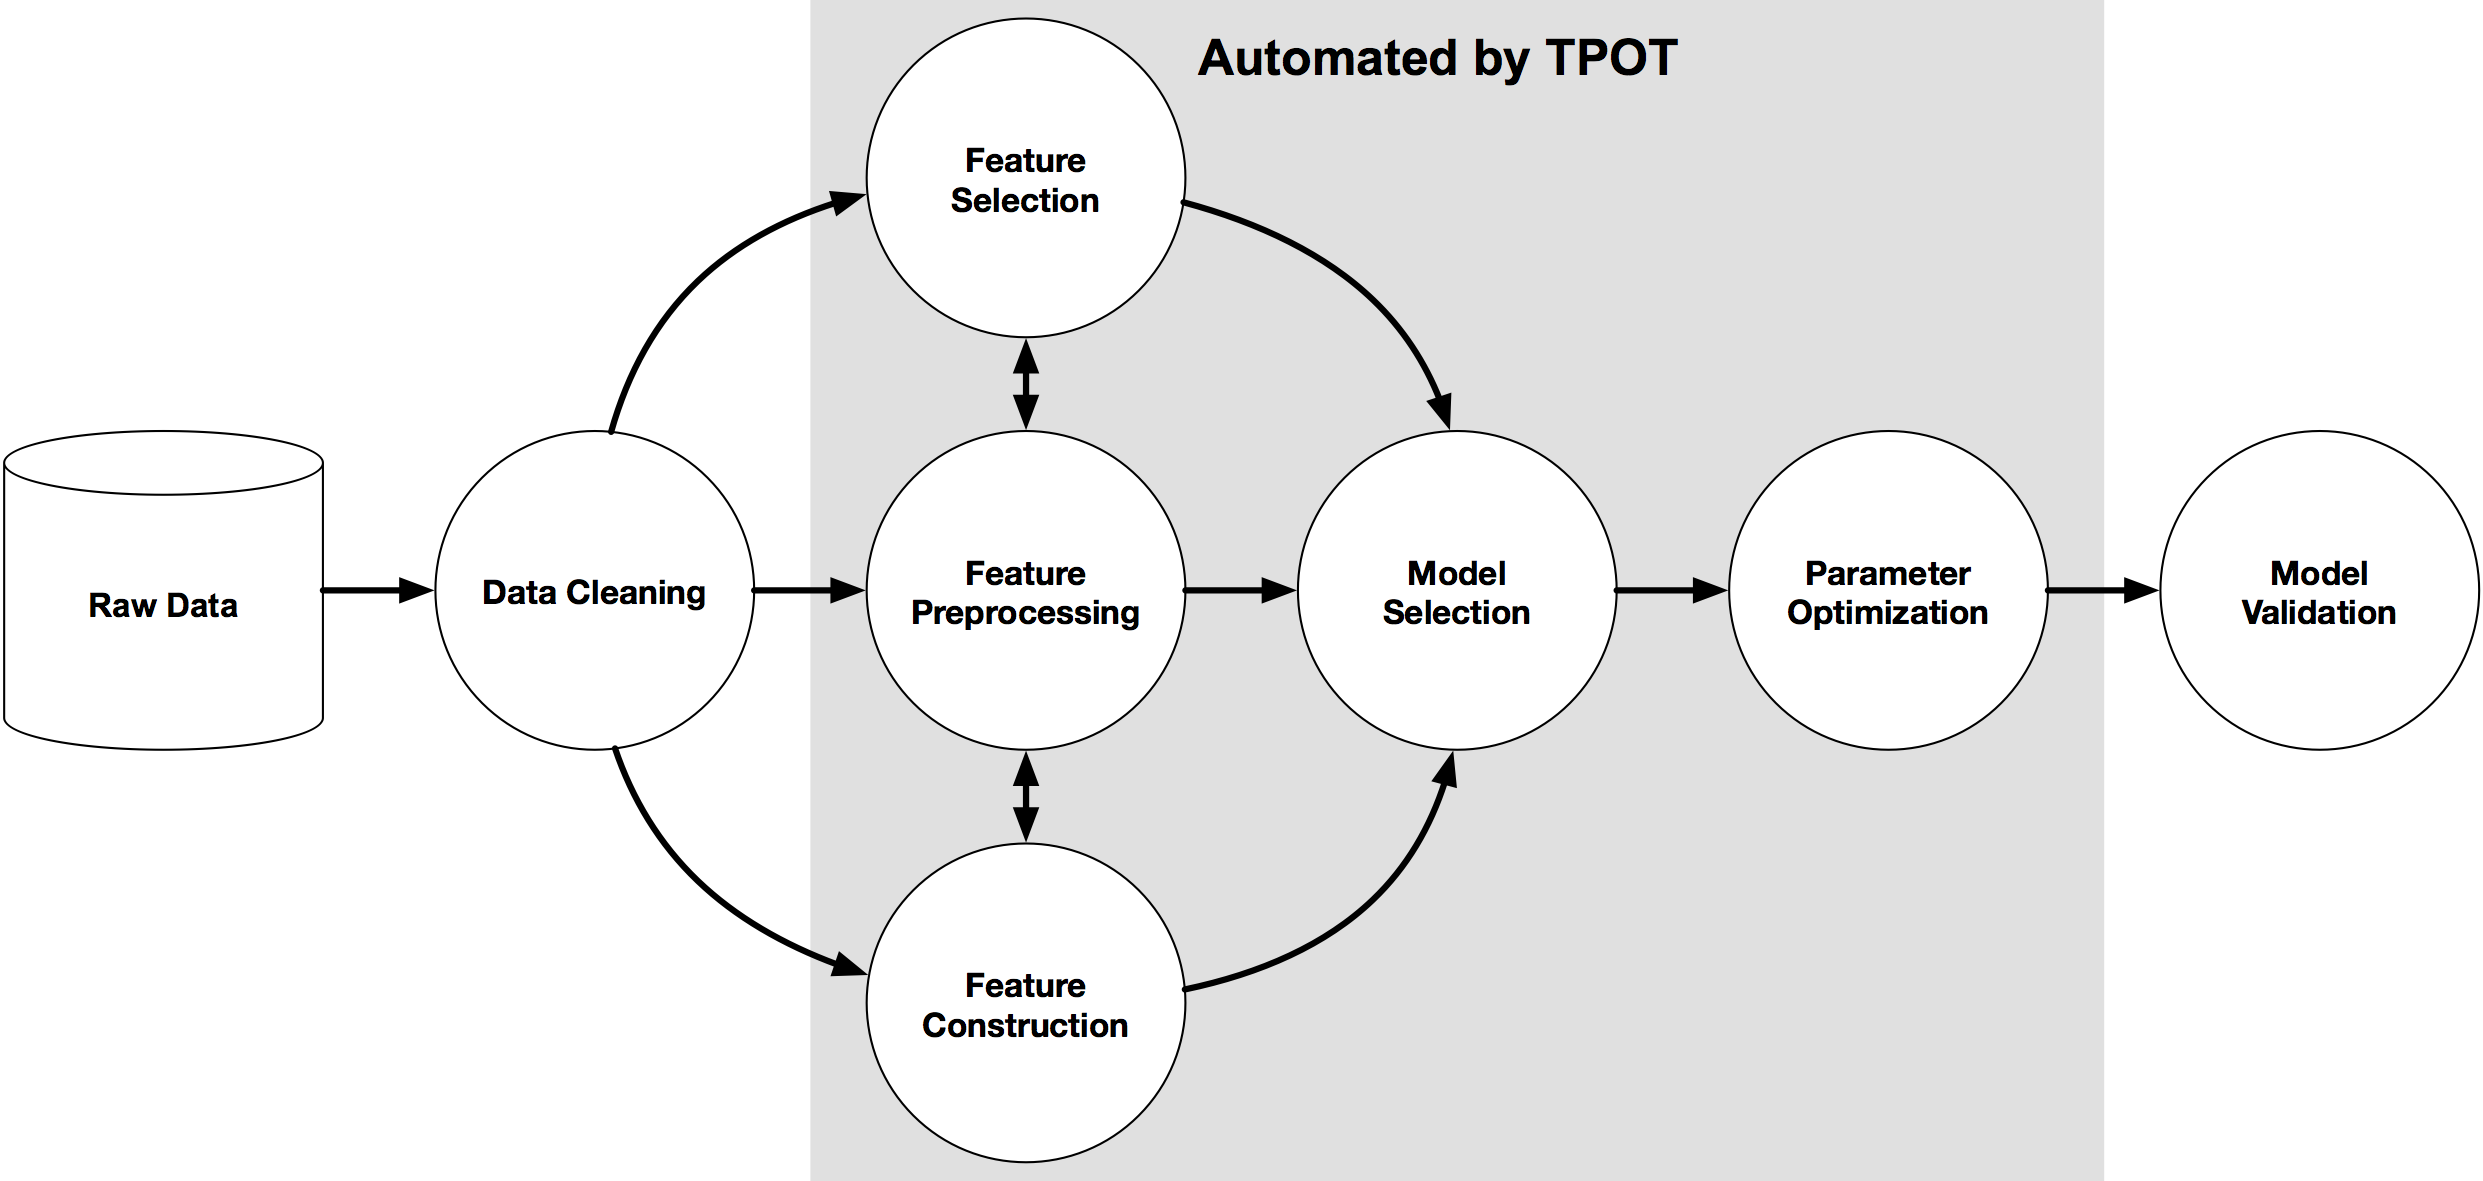

Sources:
* https://dl.acm.org/doi/pdf/10.1145/2908812.2908918
* https://github.com/EpistasisLab/tpot
* https://machinelearningmastery.com/automl-libraries-for-python/

In [12]:
# from sklearn.model_selection import RepeatedStratifiedKFold
# from tpot import TPOTClassifier
from multi_train_TPOT import MultiTrain
import pandas as pd
import matplotlib.pyplot as plt

### Initialize MultiTrain

In [2]:
multi = MultiTrain()
X_train = pd.read_csv('./data/Titanic/train.csv',index_col='PassengerId')
y_train = X_train['Survived']

# One hot encode 'Sex', 'Embarked' cols and remove target col
X_train = X_train.join(pd.get_dummies(X_train['Sex']))
X_train = X_train.join(pd.get_dummies(X_train['Embarked']))

X_train = X_train.drop(['Survived', 'Name', 'Sex', 'Cabin', 'Ticket', 'Embarked'], axis=1)

multi.X_train = X_train
multi.y_train = y_train

In [3]:
multi.X_train

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
PassengerId,,,,,,,,,,
1,3,22.0,1,0,7.2500,0,1,0,0,1
2,1,38.0,1,0,71.2833,1,0,1,0,0
3,3,26.0,0,0,7.9250,1,0,0,0,1
4,1,35.0,1,0,53.1000,1,0,0,0,1
5,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
887,2,27.0,0,0,13.0000,0,1,0,0,1
888,1,19.0,0,0,30.0000,1,0,0,0,1
889,3,NaN,1,2,23.4500,1,0,0,0,1


### define search

In [4]:
# generations = [4, 16, 32, 64, 128]
population_sizes = [1, 2, 4, 8, 16, 32, 64, 128]
offspring_sizes =  [1, 2, 4, 8, 16, 32, 64, 128]
mutation_rates =   [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
crossover_rates =  [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]

# # One run:
# generations = []
# population_sizes = []
# offspring_sizes = []
# mutation_rates = []
# crossover_rates = []


In [5]:
%%time
multi.build_and_fit_classifier(dataset_name='Titanic', generations=generations,
                              population_sizes=population_sizes,
                              offspring_sizes=offspring_sizes,
                              mutation_rates=mutation_rates,
                              crossover_rates=crossover_rates)

-> Fitting - Population Size: 1
Imputing missing values in feature set


Optimization Progress:   0%|          | 0/1 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8159625886636117

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=False, criterion=entropy, max_features=0.1, min_samples_leaf=4, min_samples_split=16, n_estimators=100)
Imputing missing values in feature set
Finished - saved to './models/Titanic/tpot/tpot_Titanic_population-size_1.py'
-> Fitting - Population Size: 2
Imputing missing values in feature set


Optimization Progress:   0%|          | 0/2 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8159500345238844

Best pipeline: ExtraTreesClassifier(FastICA(input_matrix, tol=0.1), bootstrap=False, criterion=gini, max_features=0.9500000000000001, min_samples_leaf=5, min_samples_split=5, n_estimators=100)
Imputing missing values in feature set
Finished - saved to './models/Titanic/tpot/tpot_Titanic_population-size_2.py'
-> Fitting - Population Size: 4
Imputing missing values in feature set


Optimization Progress:   0%|          | 0/4 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7789341535371289

Best pipeline: XGBClassifier(input_matrix, learning_rate=0.001, max_depth=8, min_child_weight=10, n_estimators=100, n_jobs=1, subsample=0.6500000000000001, verbosity=0)
Imputing missing values in feature set
Finished - saved to './models/Titanic/tpot/tpot_Titanic_population-size_4.py'
-> Fitting - Population Size: 8
Imputing missing values in feature set


Optimization Progress:   0%|          | 0/8 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8148264390182662

Best pipeline: MLPClassifier(StandardScaler(input_matrix), alpha=0.01, learning_rate_init=0.01)
Imputing missing values in feature set
Finished - saved to './models/Titanic/tpot/tpot_Titanic_population-size_8.py'
-> Fitting - Population Size: 16
Imputing missing values in feature set


Optimization Progress:   0%|          | 0/16 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8339212855439081

Best pipeline: GradientBoostingClassifier(input_matrix, learning_rate=0.1, max_depth=4, max_features=0.6000000000000001, min_samples_leaf=1, min_samples_split=17, n_estimators=100, subsample=0.9000000000000001)
Imputing missing values in feature set
Finished - saved to './models/Titanic/tpot/tpot_Titanic_population-size_16.py'
-> Fitting - Population Size: 32
Imputing missing values in feature set


Optimization Progress:   0%|          | 0/32 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8328165212478815

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=False, criterion=gini, max_features=0.55, min_samples_leaf=1, min_samples_split=16, n_estimators=100)
Imputing missing values in feature set
Finished - saved to './models/Titanic/tpot/tpot_Titanic_population-size_32.py'
-> Fitting - Population Size: 64
Imputing missing values in feature set


Optimization Progress:   0%|          | 0/64 [00:00<?, ?pipeline/s]

/usr/local/lib/python3.8/dist-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")
/usr/local/lib/python3.8/dist-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")
/usr/local/lib/python3.8/dist-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")



14.02 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=False, criterion=entropy, max_features=0.2, min_samples_leaf=6, min_samples_split=14, n_estimators=100)
Imputing missing values in feature set
Finished - saved to './models/Titanic/tpot/tpot_Titanic_population-size_64.py'
-> Fitting - Population Size: 128
Imputing missing values in feature set


/usr/local/lib/python3.8/dist-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")
/usr/local/lib/python3.8/dist-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")
/usr/local/lib/python3.8/dist-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


Optimization Progress:   0%|          | 0/128 [00:00<?, ?pipeline/s]


10.80 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: RandomForestClassifier(MinMaxScaler(input_matrix), bootstrap=False, criterion=entropy, max_features=0.6000000000000001, min_samples_leaf=9, min_samples_split=15, n_estimators=100)
Imputing missing values in feature set
Finished - saved to './models/Titanic/tpot/tpot_Titanic_population-size_128.py'
-> Fitting - Offspring Size: 1
Imputing missing values in feature set


Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8350323269097985

Best pipeline: RandomForestClassifier(RobustScaler(input_matrix), bootstrap=True, criterion=gini, max_features=0.7500000000000001, min_samples_leaf=5, min_samples_split=4, n_estimators=100)
Imputing missing values in feature set
Finished - saved to './models/Titanic/tpot/tpot_Titanic_offspring-size_1.py'
-> Fitting - Offspring Size: 2
Imputing missing values in feature set


Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8395141547925429

Best pipeline: RandomForestClassifier(XGBClassifier(input_matrix, learning_rate=0.1, max_depth=4, min_child_weight=8, n_estimators=100, n_jobs=1, subsample=0.9000000000000001, verbosity=0), bootstrap=False, criterion=gini, max_features=0.25, min_samples_leaf=5, min_samples_split=13, n_estimators=100)
Imputing missing values in feature set
Finished - saved to './models/Titanic/tpot/tpot_Titanic_offspring-size_2.py'
-> Fitting - Offspring Size: 4
Imputing missing values in feature set


Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8350323269097985

Best pipeline: GradientBoostingClassifier(RFE(input_matrix, criterion=entropy, max_features=0.4, n_estimators=100, step=0.4), learning_rate=0.1, max_depth=4, max_features=0.15000000000000002, min_samples_leaf=17, min_samples_split=18, n_estimators=100, subsample=0.5)
Imputing missing values in feature set
Finished - saved to './models/Titanic/tpot/tpot_Titanic_offspring-size_4.py'
-> Fitting - Offspring Size: 8
Imputing missing values in feature set


Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8272110978595192

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=False, criterion=entropy, max_features=0.1, min_samples_leaf=3, min_samples_split=4, n_estimators=100)
Imputing missing values in feature set
Finished - saved to './models/Titanic/tpot/tpot_Titanic_offspring-size_8.py'
-> Fitting - Offspring Size: 16
Imputing missing values in feature set


Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8350386039796621

Best pipeline: RandomForestClassifier(DecisionTreeClassifier(input_matrix, criterion=gini, max_depth=1, min_samples_leaf=19, min_samples_split=18), bootstrap=False, criterion=gini, max_features=0.55, min_samples_leaf=7, min_samples_split=10, n_estimators=100)
Imputing missing values in feature set
Finished - saved to './models/Titanic/tpot/tpot_Titanic_offspring-size_16.py'
-> Fitting - Offspring Size: 32
Imputing missing values in feature set


Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8339338396836358

Best pipeline: RandomForestClassifier(StandardScaler(input_matrix), bootstrap=True, criterion=entropy, max_features=0.55, min_samples_leaf=2, min_samples_split=7, n_estimators=100)
Imputing missing values in feature set
Finished - saved to './models/Titanic/tpot/tpot_Titanic_offspring-size_32.py'
-> Fitting - Offspring Size: 64
Imputing missing values in feature set


Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8316866486723997

Best pipeline: GradientBoostingClassifier(input_matrix, learning_rate=0.1, max_depth=6, max_features=0.7000000000000001, min_samples_leaf=17, min_samples_split=6, n_estimators=100, subsample=1.0)
Imputing missing values in feature set
Finished - saved to './models/Titanic/tpot/tpot_Titanic_offspring-size_64.py'
-> Fitting - Offspring Size: 128
Imputing missing values in feature set


Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


10.67 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: RandomForestClassifier(MinMaxScaler(input_matrix), bootstrap=False, criterion=gini, max_features=0.7000000000000001, min_samples_leaf=4, min_samples_split=18, n_estimators=100)
Imputing missing values in feature set
Finished - saved to './models/Titanic/tpot/tpot_Titanic_offspring-size_128.py'
-> Fitting - Mutation Rate: 0.1, Crossover Rate: 0.9
Imputing missing values in feature set


Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


17.25 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: ExtraTreesClassifier(XGBClassifier(input_matrix, learning_rate=0.5, max_depth=2, min_child_weight=18, n_estimators=100, n_jobs=1, subsample=0.6000000000000001, verbosity=0), bootstrap=True, criterion=entropy, max_features=0.6000000000000001, min_samples_leaf=1, min_samples_split=5, n_estimators=100)
Imputing missing values in feature set
Finished - saved to './models/Titanic/tpot/tpot_Titanic_mut-cross-rate_0.1,0.9.py'
-> Fitting - Mutation Rate: 0.2, Crossover Rate: 0.8
Imputing missing values in feature set


Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


16.69 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: GradientBoostingClassifier(BernoulliNB(input_matrix, alpha=0.001, fit_prior=True), learning_rate=0.1, max_depth=8, max_features=0.7000000000000001, min_samples_leaf=19, min_samples_split=17, n_estimators=100, subsample=0.8)
Imputing missing values in feature set
Finished - saved to './models/Titanic/tpot/tpot_Titanic_mut-cross-rate_0.2,0.8.py'
-> Fitting - Mutation Rate: 0.3, Crossover Rate: 0.7
Imputing missing values in feature set


Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]

/usr/local/lib/python3.8/dist-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")
/usr/local/lib/python3.8/dist-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")
/usr/local/lib/python3.8/dist-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")



16.31 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: RandomForestClassifier(LinearSVC(input_matrix, C=0.5, dual=True, loss=hinge, penalty=l2, tol=0.1), bootstrap=False, criterion=entropy, max_features=0.9500000000000001, min_samples_leaf=5, min_samples_split=11, n_estimators=100)
Imputing missing values in feature set
Finished - saved to './models/Titanic/tpot/tpot_Titanic_mut-cross-rate_0.3,0.7.py'
-> Fitting - Mutation Rate: 0.4, Crossover Rate: 0.6
Imputing missing values in feature set


Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


16.79 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: XGBClassifier(RFE(input_matrix, criterion=gini, max_features=0.1, n_estimators=100, step=0.6000000000000001), learning_rate=0.5, max_depth=3, min_child_weight=11, n_estimators=100, n_jobs=1, subsample=0.8, verbosity=0)
Imputing missing values in feature set
Finished - saved to './models/Titanic/tpot/tpot_Titanic_mut-cross-rate_0.4,0.6.py'
-> Fitting - Mutation Rate: 0.5, Crossover Rate: 0.5
Imputing missing values in feature set


Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8361747536250078

Best pipeline: RandomForestClassifier(VarianceThreshold(input_matrix, threshold=0.01), bootstrap=False, criterion=gini, max_features=0.55, min_samples_leaf=6, min_samples_split=5, n_estimators=100)
Imputing missing values in feature set
Finished - saved to './models/Titanic/tpot/tpot_Titanic_mut-cross-rate_0.5,0.5.py'
-> Fitting - Mutation Rate: 0.6, Crossover Rate: 0.4
Imputing missing values in feature set


Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


11.00 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=True, criterion=gini, max_features=0.45, min_samples_leaf=2, min_samples_split=11, n_estimators=100)
Imputing missing values in feature set
Finished - saved to './models/Titanic/tpot/tpot_Titanic_mut-cross-rate_0.6,0.4.py'
-> Fitting - Mutation Rate: 0.7, Crossover Rate: 0.3
Imputing missing values in feature set


Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


10.05 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: RandomForestClassifier(MaxAbsScaler(input_matrix), bootstrap=False, criterion=entropy, max_features=0.5, min_samples_leaf=4, min_samples_split=9, n_estimators=100)
Imputing missing values in feature set
Finished - saved to './models/Titanic/tpot/tpot_Titanic_mut-cross-rate_0.7,0.3.py'
-> Fitting - Mutation Rate: 0.8, Crossover Rate: 0.2
Imputing missing values in feature set


Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


10.63 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=True, criterion=entropy, max_features=0.7500000000000001, min_samples_leaf=2, min_samples_split=18, n_estimators=100)
Imputing missing values in feature set
Finished - saved to './models/Titanic/tpot/tpot_Titanic_mut-cross-rate_0.8,0.2.py'
-> Fitting - Mutation Rate: 0.9, Crossover Rate: 0.1
Imputing missing values in feature set


Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


11.04 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=False, criterion=gini, max_features=0.55, min_samples_leaf=5, min_samples_split=19, n_estimators=100)
Imputing missing values in feature set
Finished - saved to './models/Titanic/tpot/tpot_Titanic_mut-cross-rate_0.9,0.1.py'
End
CPU times: user 19min 30s, sys: 1min 38s, total: 21min 8s
Wall time: 3h 23min 19s


### Visualize

In [9]:
collected_data = pd.read_csv('./models/Titanic/tpot/logs/log.csv', index_col=[0])
collected_data

,Feature,Value,Elapsed_Time,Score
0,Population_Size,1,20.181109,0.877666
1,Population_Size,2,29.068016,0.875421
2,Population_Size,4,18.507955,0.805836
3,Population_Size,8,57.636420,0.872054
4,Population_Size,16,154.624828,0.920314
5,Population_Size,32,193.245898,0.913580
6,Population_Size,64,843.155685,0.879910
7,Population_Size,128,651.913435,0.879910
8,Offspring_Size,1,577.059772,0.883277
9,Offspring_Size,2,345.205056,0.896745


In [10]:
population_size_df = collected_data[collected_data['Feature'] == 'Population_Size']
offspring_size_df = collected_data[collected_data['Feature'] == 'Offspring_Size']
mutcross_rates_df = collected_data[collected_data['Feature'] == 'Mutation_Crossover_Rates']

### Population Size Effects

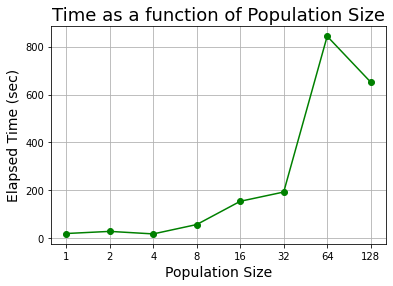

In [13]:
plt.plot(population_size_df['Value'], population_size_df['Elapsed_Time'], color='green', marker='o')
plt.title('Time as a function of Population Size', fontsize=18)
plt.xlabel('Population Size', fontsize=14)
plt.ylabel('Elapsed Time (sec)', fontsize=14)
plt.grid(True)
plt.show()

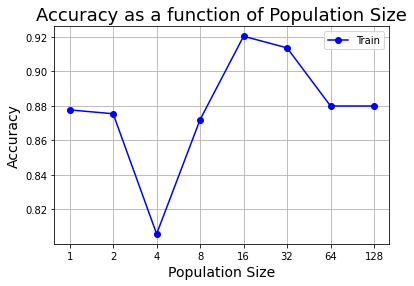

In [17]:
plt.plot(population_size_df['Value'], population_size_df['Score'], color='blue', marker='o', label='Train')
# plt.plot(population_size_df['Value'], population_size_df['Test_Score'], color='red', marker='o', label='Test')
plt.legend()

plt.title('Accuracy as a function of Population Size', fontsize=18)
plt.xlabel('Population Size', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True)
plt.show()

### Offspring Size Effects

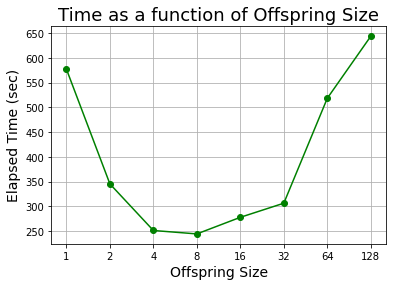

In [18]:
plt.plot(offspring_size_df['Value'], offspring_size_df['Elapsed_Time'], color='green', marker='o')
plt.title('Time as a function of Offspring Size', fontsize=18)
plt.xlabel('Offspring Size', fontsize=14)
plt.ylabel('Elapsed Time (sec)', fontsize=14)
plt.grid(True)
plt.show()

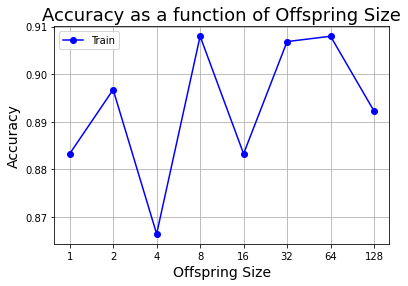

In [20]:
plt.plot(offspring_size_df['Value'], offspring_size_df['Score'], color='blue', marker='o', label='Train')
plt.legend()

plt.title('Accuracy as a function of Offspring Size', fontsize=18)
plt.xlabel('Offspring Size', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True)
plt.show()

### Mutation - Crossover Rates Effects

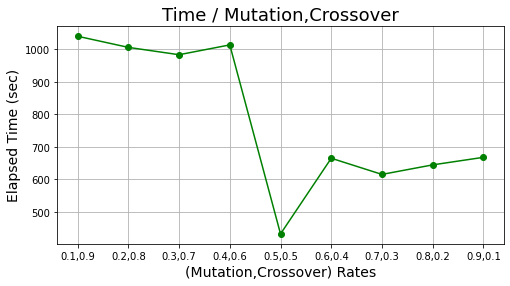

In [21]:
plt.figure(figsize=(8,4))

plt.plot(mutcross_rates_df['Value'], mutcross_rates_df['Elapsed_Time'], color='green', marker='o')
plt.title('Time / Mutation,Crossover', fontsize=18)
plt.xlabel('(Mutation,Crossover) Rates', fontsize=14)
plt.ylabel('Elapsed Time (sec)', fontsize=14)
plt.grid(True)

plt.show()

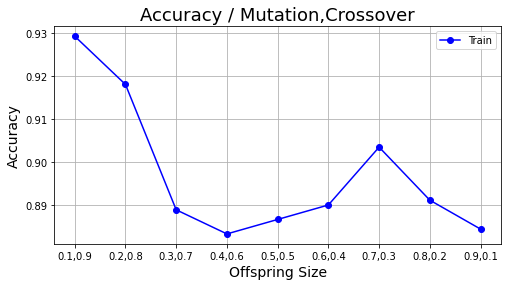

In [22]:
plt.figure(figsize=(8,4))
plt.plot(mutcross_rates_df['Value'], mutcross_rates_df['Score'], color='blue', marker='o', label='Train')
plt.legend()

plt.title('Accuracy / Mutation,Crossover', fontsize=18)
plt.xlabel('Offspring Size', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True)
plt.show()